# Barres Comprimées 


## Base de donnée

In [1]:
parametres_bois = {
    "C16": {"f_c0d": 10.0, "lambda_factor": 57, "beta_c": 0.2},
    "C24": {"f_c0d": 12.4, "lambda_factor": 57, "beta_c": 0.2},
    "C30": {"f_c0d": 14.1, "lambda_factor": 57, "beta_c": 0.2},
    "D30": {"f_c0d": 14.1, "lambda_factor": 57, "beta_c": 0.2},
    "GL20h": {"f_c0d": 13.3, "lambda_factor": 60, "beta_c": 0.1},
    "GL24h": {"f_c0d": 14.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL24c": {"f_c0d": 14.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL28h": {"f_c0d": 16.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL28c": {"f_c0d": 16.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL32h": {"f_c0d": 21.3, "lambda_factor": 60, "beta_c": 0.1},
    "GL32c": {"f_c0d": 21.3, "lambda_factor": 60, "beta_c": 0.1}
}


In [2]:
import pandas as pd

# Dictionnaire des dimensions standard
dimensions_standard = {
    "Bois Massif": [
        (60, [100, 120, 140, 160, 180, 200]),
        (80, [100, 120, 140, 160, 180, 200, 220, 240]),
        (100, [100, 120, 140, 160, 180, 200, 220, 240, 260, 280]),
        (120, [120, 140, 160, 180, 200, 220, 240, 260, 280, 300]),
        (140, [140, 160, 180, 200, 220, 240, 260, 280, 300]),
        (160, [160, 180, 200, 220, 240, 260, 280, 300]),
        (180, [180, 200, 220, 240, 260, 280, 300]),
        (200, [200, 220, 240, 260, 280, 300]),
        (220, [220, 240, 260, 280, 300]),
        (240, [240, 260, 280, 300])
    ],
    "BLC": [
        (100, [120, 160, 200, 240, 280, 320, 360, 400, 440]),
        (120, [160, 200, 240, 280, 320, 360, 400, 440, 480]),
        (140, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560]),
        (160, [240, 280, 320, 360, 400, 440, 480, 520, 560, 600]),
        (180, [280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680]),
        (200, [320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720]),
        (220, [360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760]),
        (240, [400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800]),
        (260, [440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840]),
        (280, [480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880]),
        (300, [520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920]),
        (320, [560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960]),
        (340, [600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
        (360, [640, 680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040]),
        (380, [680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080]),
        (400, [720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080, 1120]),
    ]
}

# Fonction pour créer un DataFrame à partir des dimensions
def creer_dataframe(dimensions, type_bois):
    data = {"Type de Bois": [], "b (mm)": [], "h (mm)": []}
    for b, h_values in dimensions:
        for h in h_values:
            data["Type de Bois"].append(type_bois)
            data["b (mm)"].append(b)
            data["h (mm)"].append(h)
    return pd.DataFrame(data)

# Création des DataFrames
df_bois_massif = creer_dataframe(dimensions_standard["Bois Massif"], "Bois Massif")
df_bois_blc = creer_dataframe(dimensions_standard["BLC"], "BLC")

# Fusion des DataFrames
df_bois_combined = pd.concat([df_bois_massif, df_bois_blc], ignore_index=True)

# Affichage du DataFrame combiné
display(df_bois_combined)

# Exporter les données dans un fichier CSV
df_bois_combined.to_csv("dimensions_bois.csv", index=False)
print("\nFichier 'dimensions_bois.csv' créé avec succès!")


,Type de Bois,b (mm),h (mm)
0,Bois Massif,60,100
1,Bois Massif,60,120
2,Bois Massif,60,140
3,Bois Massif,60,160
4,Bois Massif,60,180
...,...,...,...
238,BLC,400,960
239,BLC,400,1000
240,BLC,400,1040
241,BLC,400,1080



Fichier 'dimensions_bois.csv' créé avec succès!


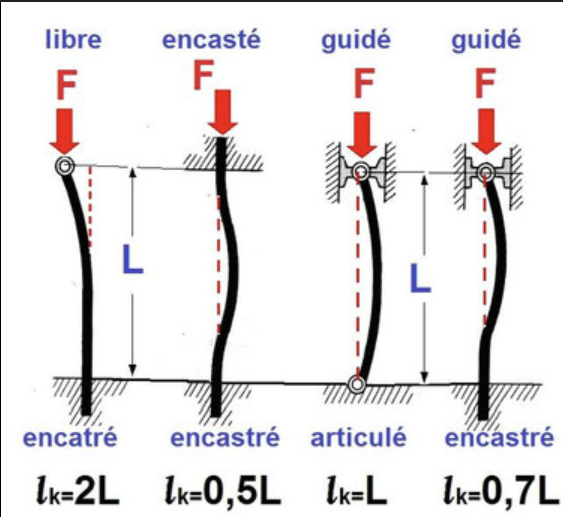

## Ned max

ce code permet de trouvé le Ned max de chaque type de bois selon les dimensions, le type de choc, Lk et la classe d'humidité 

In [19]:
import math
import pandas as pd


def calculer_rayon_giration(b, h):
    r_y = 0.289 * h
    r_z = 0.289 * b
    return r_y, r_z

def calculer_lambda_rel(Lk, r, lambda_factor):
    lambda_geom = Lk / r
    return lambda_geom / lambda_factor

def calculer_kc(lambda_rel, beta_c):
    k = 0.5 * (1 + beta_c * (lambda_rel - 0.3) + lambda_rel**2)
    discriminant = k**2 - lambda_rel**2
    return 1 / (k + math.sqrt(discriminant)) if discriminant >= 0 else 1.0

def calculer_Ned_max(dimensions, Lk, Ned, type_charge, classe_humidite):
    b, h = dimensions
    A = b * h

    eta_t = {"période infinie": 1.0, "choc": 1.4}.get(type_charge.lower(), 1.4)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)

    resultats = []
    for type_bois, propriete in parametres_bois.items():
        f_c0d = propriete["f_c0d"]
        lambda_factor = propriete["lambda_factor"]
        beta_c = propriete["beta_c"]

        r_y, r_z = calculer_rayon_giration(b, h)
        lambda_rel_y = calculer_lambda_rel(Lk, r_y, lambda_factor)
        lambda_rel_z = calculer_lambda_rel(Lk, r_z, lambda_factor)

        kc_y = calculer_kc(lambda_rel_y, beta_c)
        kc_z = calculer_kc(lambda_rel_z, beta_c)

        f_c0d_mod = f_c0d * eta_t * eta_w
        Ned_max_y = kc_y * f_c0d_mod * A
        Ned_max_z = kc_z * f_c0d_mod * A
        Ned_max_global = min(Ned_max_y, Ned_max_z)

        statut = "OK" if Ned <= Ned_max_global else "Non conforme"
        resultats.append({
            "Type de Bois": type_bois,
            "λ_rel,y": round(lambda_rel_y, 3),
            "λ_rel,z": round(lambda_rel_z, 3),
            "k_c,y": round(kc_y, 3),
            "k_c,z": round(kc_z, 3),
            "Ned_max (N)": round(Ned_max_global, 2),
            "Statut": statut
        })

    return pd.DataFrame(resultats)

# Entrées
dimensions = (220, 220)  # largeur, hauteur
Lk = 4200  # Longueur de flambage
Ned = 264000  # Effort appliqué en N
type_charge = "période infinie"
classe_humidite = 1

# Résultats
df_resultats = calculer_Ned_max(dimensions, Lk, Ned, type_charge, classe_humidite)
display(df_resultats)


,Type de Bois,"λ_rel,y","λ_rel,z","k_c,y","k_c,z",Ned_max (N),Statut
0,C16,1.159,1.159,0.573,0.573,277307.40,OK
1,C24,1.159,1.159,0.573,0.573,343861.18,OK
2,C30,1.159,1.159,0.573,0.573,391003.44,OK
3,D30,1.159,1.159,0.573,0.573,391003.44,OK
4,GL20h,1.101,1.101,0.683,0.683,439509.51,OK
5,GL24h,1.101,1.101,0.683,0.683,462641.59,OK
6,GL24c,1.101,1.101,0.683,0.683,462641.59,OK
7,GL28h,1.101,1.101,0.683,0.683,528733.25,OK
8,GL28c,1.101,1.101,0.683,0.683,528733.25,OK
9,GL32h,1.101,1.101,0.683,0.683,703876.14,OK


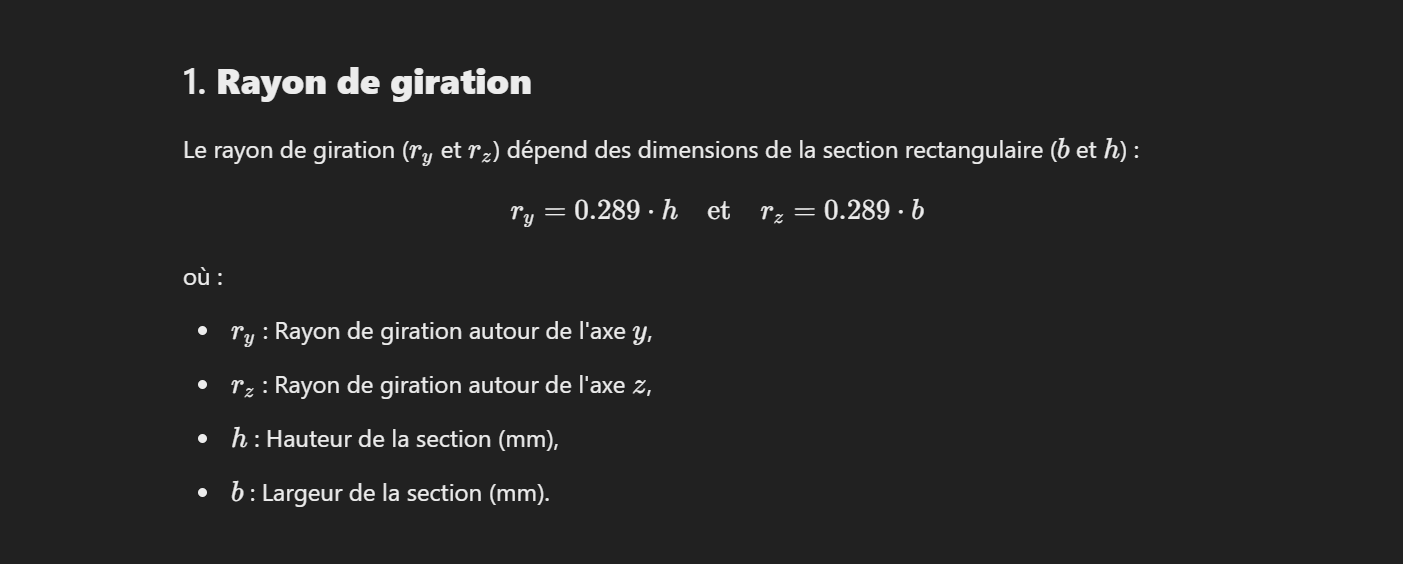
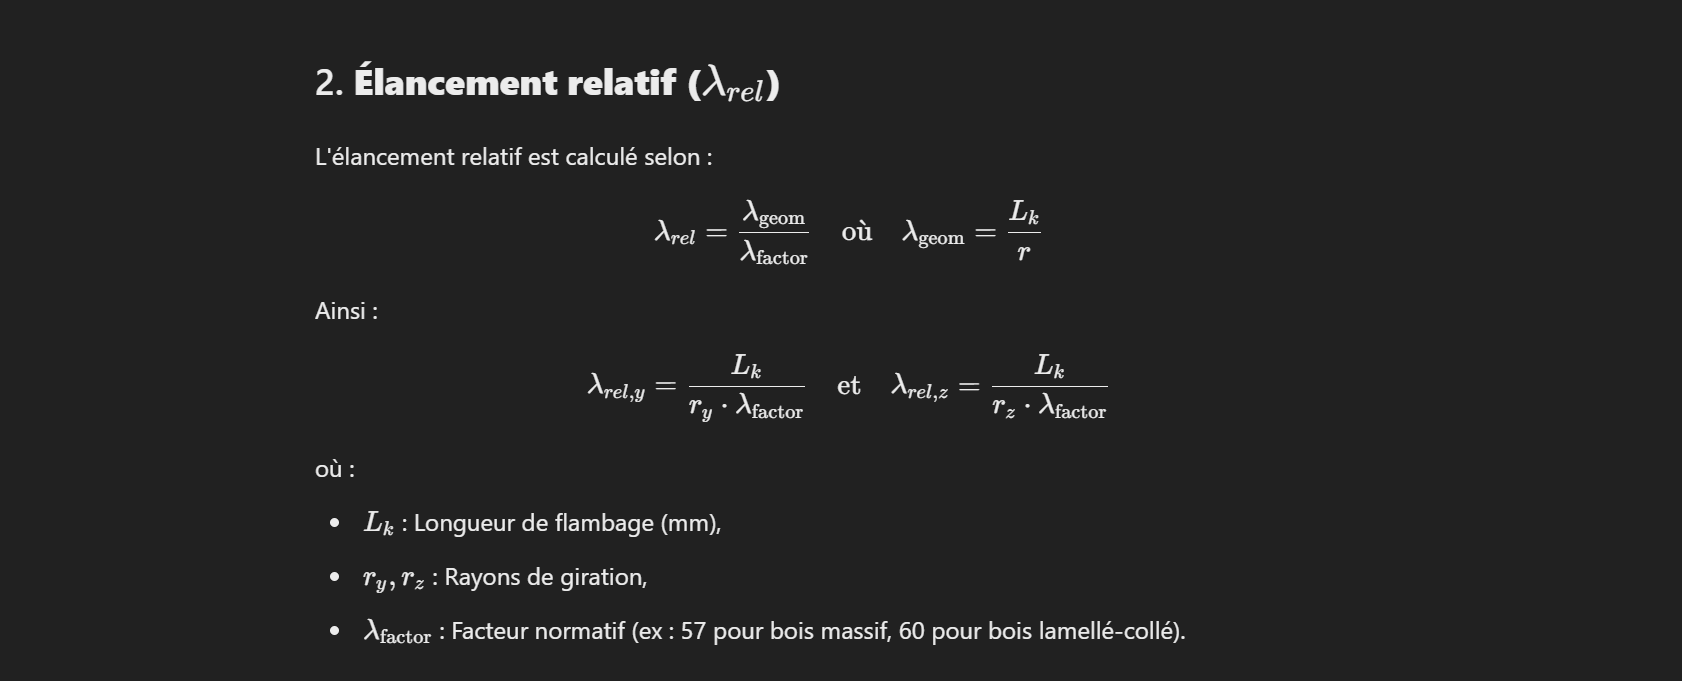
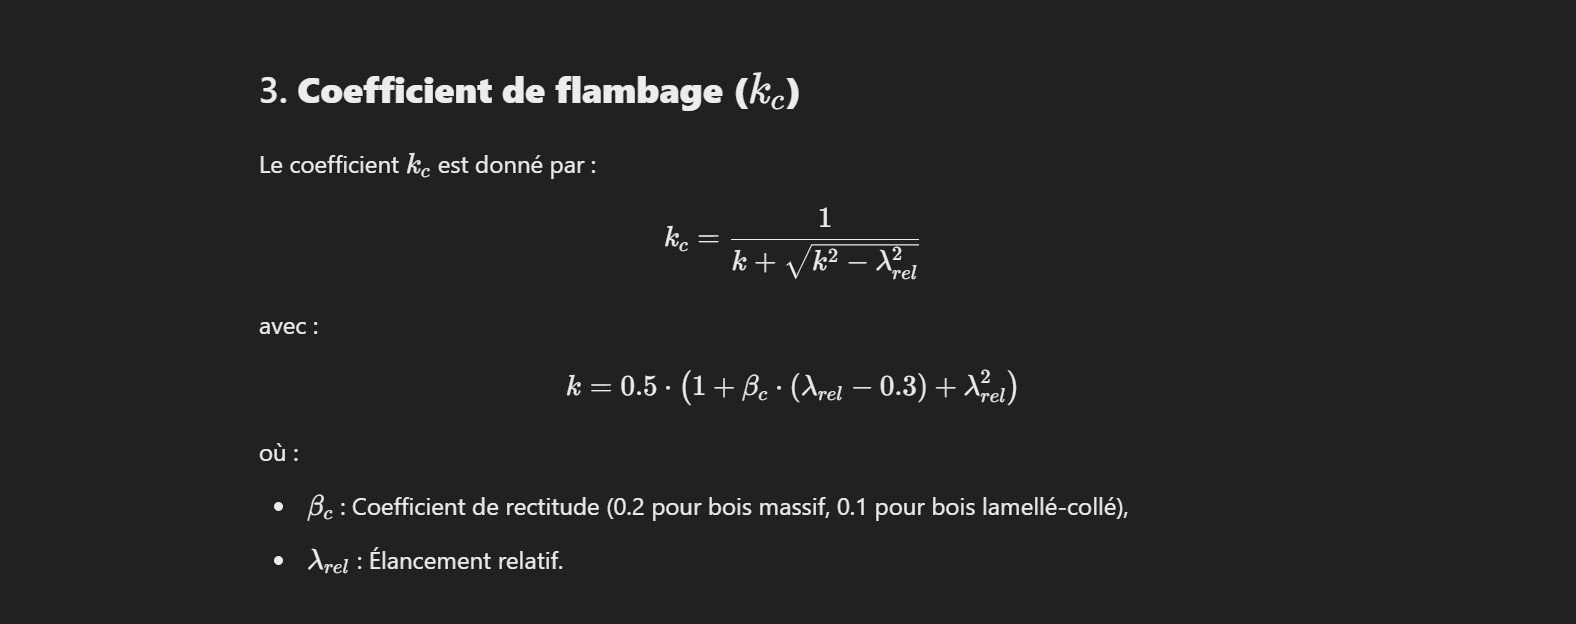
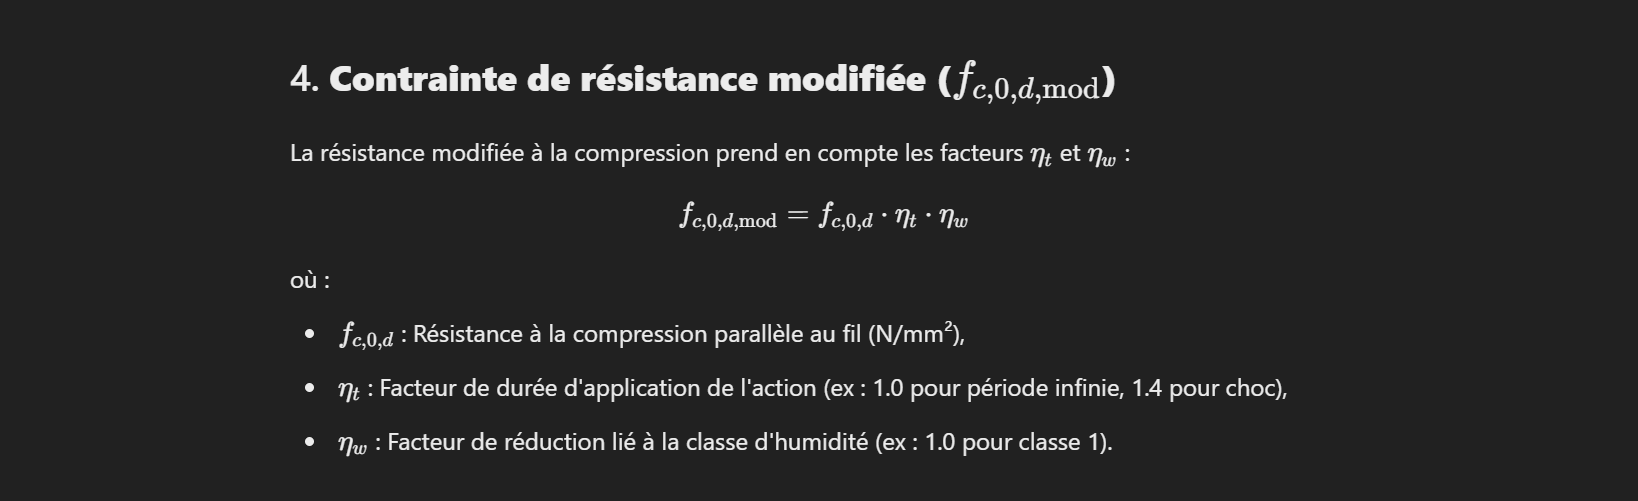
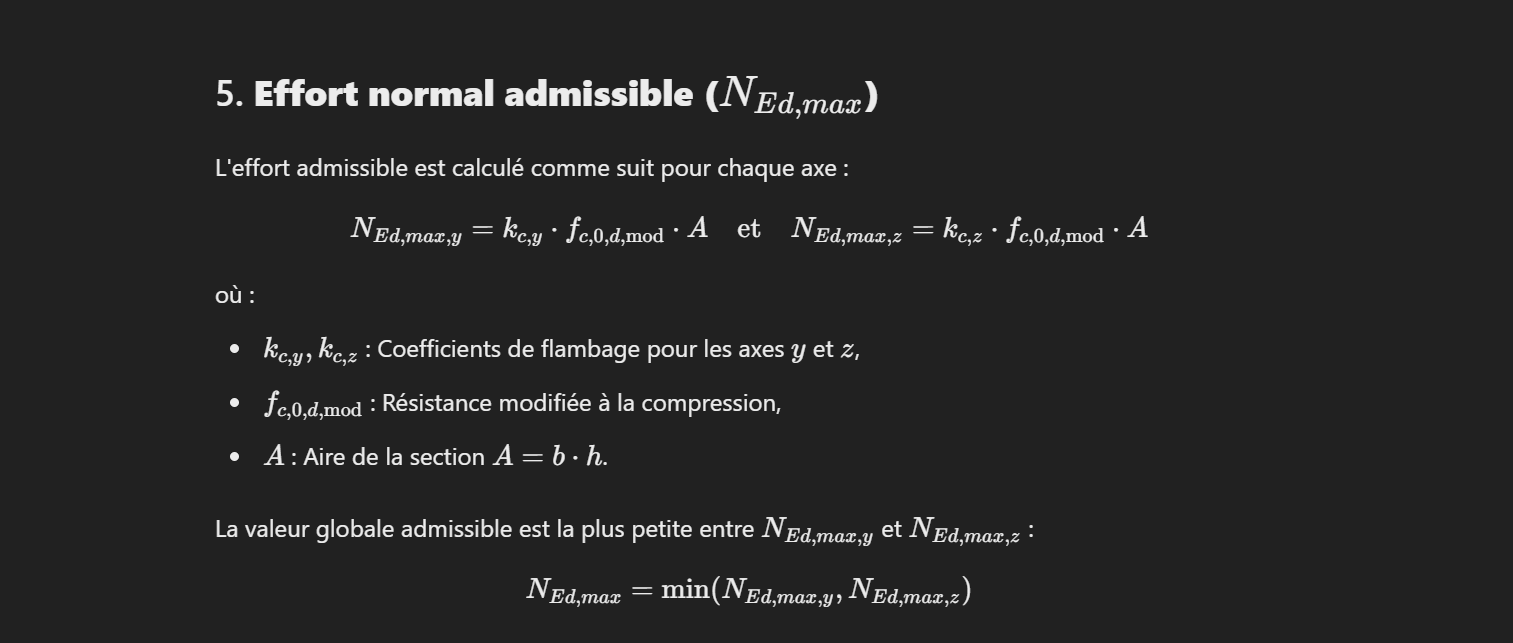
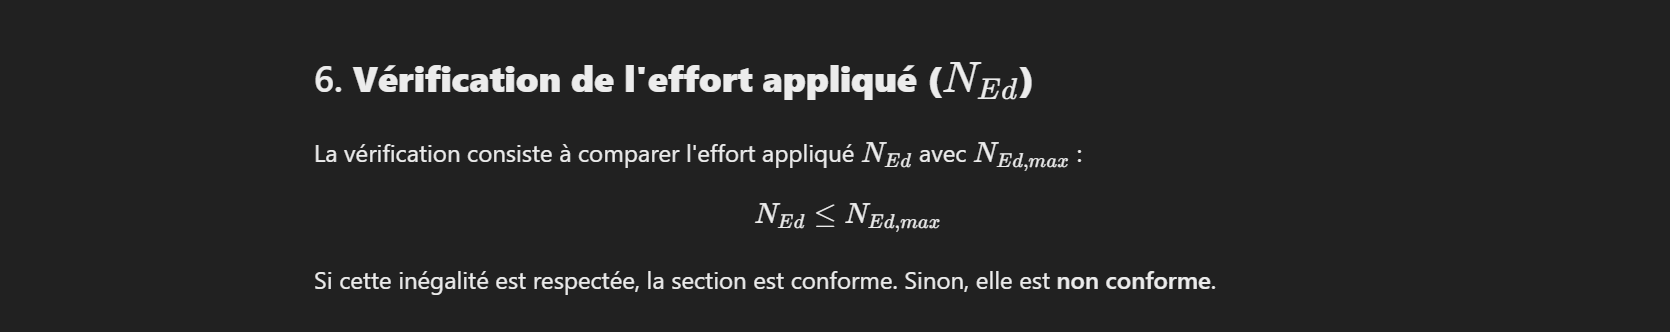

# Hauteur minimum 
Calcule de la section minimum avec b défini 


In [9]:
import pandas as pd
import math

# Création des DataFrames pour les dimensions
def creer_dataframe(dimensions, groupe_bois):
    data = {"Type de Bois": [], "b (mm)": [], "h (mm)": []}
    for type_bois in parametres_bois.keys():
        # Vérifier si le type de bois appartient au groupe
        est_massif = type_bois in ["C16", "C24", "C30", "D30"]
        est_blc = type_bois.startswith("GL")
        if (groupe_bois == "Bois Massif" and est_massif) or (groupe_bois == "BLC" and est_blc):
            for b, h_values in dimensions[groupe_bois]:
                for h in h_values:
                    data["Type de Bois"].append(type_bois)
                    data["b (mm)"].append(b)
                    data["h (mm)"].append(h)
    return pd.DataFrame(data)

df_bois_massif = creer_dataframe(dimensions_standard, "Bois Massif")
df_bois_blc = creer_dataframe(dimensions_standard, "BLC")
df_combined = pd.concat([df_bois_massif, df_bois_blc], ignore_index=True)

# Calcul du rayon de giration
def calculer_rayon_giration(b, h):
    r_y = 0.289 * h
    r_z = 0.289 * b
    return r_y, r_z

# Calcul de l'élancement relatif
def calculer_lambda_rel(Lk, r, lambda_factor):
    lambda_geom = Lk / r
    lambda_rel = lambda_geom / lambda_factor
    return lambda_rel

# Calcul du coefficient kc
def calculer_kc(lambda_rel, beta_c):
    k = 0.5 * (1 + beta_c * (lambda_rel - 0.3) + lambda_rel**2)
    discriminant = k**2 - lambda_rel**2
    if discriminant >= 0:
        kc = 1 / (k + math.sqrt(discriminant))
    else:
        kc = 1.0  # Valeur par défaut si discriminant négatif
    return max(min(kc, 1.0), 0.1)  # kc borné entre 0.1 et 1.0

# Fonction pour trouver la hauteur minimale
def trouver_hauteur_minimale(Ned, Lk, type_charge, type_bois, classe_humidite, b):
    eta_t = 1.0 if type_charge.lower() == "période infinie" else 1.4
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)
    
    if type_bois not in parametres_bois:
        return f"Type de bois '{type_bois}' non reconnu."
    
    f_c0d = parametres_bois[type_bois]["f_c0d"]
    lambda_factor = parametres_bois[type_bois]["lambda_factor"]
    beta_c = parametres_bois[type_bois]["beta_c"]
    
    # Résistance modifiée
    f_c0d_mod = f_c0d * eta_t * eta_w
    
    # Filtrage des dimensions pour le type de bois et la largeur b
    df_filtre = df_combined[(df_combined["Type de Bois"] == type_bois) & (df_combined["b (mm)"] == b)]
    
    # Tri des hauteurs croissantes pour trouver la hauteur minimale
    df_filtre_sorted = df_filtre.sort_values(by="h (mm)")
    
    for _, row in df_filtre_sorted.iterrows():
        h = row["h (mm)"]
        A = b * h  # Aire de la section en mm²
        
        # Calcul du rayon de giration
        r_y, r_z = calculer_rayon_giration(b, h)
        
        # Calcul de l'élancement relatif pour les axes y et z
        lambda_rel_y = calculer_lambda_rel(Lk, r_y, lambda_factor)
        lambda_rel_z = calculer_lambda_rel(Lk, r_z, lambda_factor)
        
        # Calcul des coefficients kc pour les axes y et z
        kc_y = calculer_kc(lambda_rel_y, beta_c)
        kc_z = calculer_kc(lambda_rel_z, beta_c)
        
        # Calcul des Ned_max pour les axes y et z
        Ned_max_y = kc_y * f_c0d_mod * A
        Ned_max_z = kc_z * f_c0d_mod * A
        
        # Ned_max global est le minimum des deux axes
        Ned_max_global = min(Ned_max_y, Ned_max_z)
        
        if Ned <= Ned_max_global:
            return h  # Hauteur minimale trouvée
    
    return "Aucune hauteur trouvée pour ces paramètres."

# Exemple d'utilisation
if __name__ == "__main__":
    Ned = 276000  # Effort normal en N
    Lk = 4000     # Longueur de flambage en mm
    b = 220       # Largeur en mm
    type_bois = "C24"  # Type de bois
    type_charge = "période infinie"  # Type de charge "période infinie" ou "choc"
    classe_humidite = 1  # Classe d'humidité 1 2 ou 3 
    
    hauteur_min = trouver_hauteur_minimale(Ned, Lk, type_charge, type_bois, classe_humidite, b)
    print(f"Hauteur minimale trouvée pour {type_bois}, b = {b} mm, charge = {type_charge}, humidité = {classe_humidite} : h minimum ={hauteur_min} mm")


Hauteur minimale trouvée pour C24, b = 220 mm, charge = période infinie, humidité = 1 : h minimum =220 mm


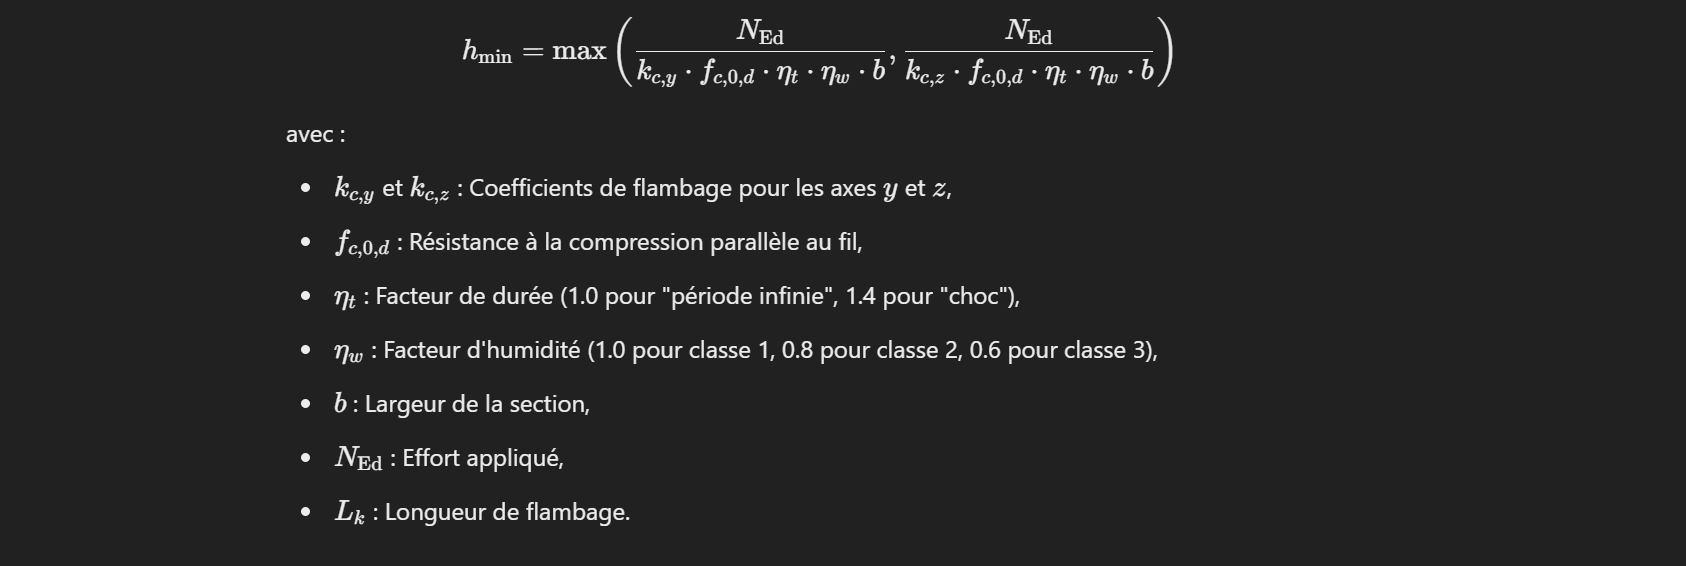

# Liste des section minimum 
ce code permet d'avoir toute les section minimum selon lk, le type de bois, la classe d'humidité et la charge Ned 

Calcul kc: lambda_rel=2.550, k=3.975, discriminant=9.302, kc=0.142
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.550, k=3.975, discriminant=9.302, kc=0.142
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.550, k=3.975, discriminant=9.302, kc=0.142
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.550, k=3.975, discriminant=9.302, kc=0.142
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.125, k=2.940, discriminant=4.127, kc=0.201
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.125, k=2.940, discriminant=4.127, kc=0.201
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.125, k=2.940, discriminant=4.127, kc=0.201
Calcul kc: lambda_rel=4.249, k=9.924, discriminant=80.420, kc=0.100
Calcul kc: lambda_rel=2.125, k=2.940, discriminant=4.12

,Type de Bois,b (mm),h (mm),Aire (mm²),lambda_rel_y,k_y,k_c_y,lambda_rel_z,k_z,k_c_z,f_c0d_mod (N/mm²),Ned_max_y (N),Ned_max_z (N),Ned_max (N),Taux d'Utilisation (%)
0,C16,220,220,48400,1.159,1.257,0.573,1.159,1.257,0.573,10.0,277307.40,277307.40,277307.40,95.20
1,C24,200,220,44000,1.159,1.257,0.573,1.275,1.410,0.497,12.4,312601.07,271086.64,271086.64,97.39
2,C30,200,200,40000,1.275,1.410,0.497,1.275,1.410,0.497,14.1,280228.86,280228.86,280228.86,94.21
3,D30,200,200,40000,1.275,1.410,0.497,1.275,1.410,0.497,14.1,280228.86,280228.86,280228.86,94.21
4,GL20h,200,200,40000,1.211,1.279,0.592,1.211,1.279,0.592,13.3,314817.33,314817.33,314817.33,83.86
5,GL24h,180,220,39600,1.101,1.146,0.683,1.346,1.458,0.496,14.0,378524.94,274725.55,274725.55,96.10
6,GL24c,180,220,39600,1.101,1.146,0.683,1.346,1.458,0.496,14.0,378524.94,274725.55,274725.55,96.10
7,GL28h,180,200,36000,1.211,1.279,0.592,1.346,1.458,0.496,16.0,340854.85,285429.14,285429.14,92.49
8,GL28c,180,200,36000,1.211,1.279,0.592,1.346,1.458,0.496,16.0,340854.85,285429.14,285429.14,92.49
9,GL32h,160,200,32000,1.211,1.279,0.592,1.514,1.707,0.401,21.3,403344.90,273259.97,273259.97,96.61



### Dessin des Sections Minimales ###


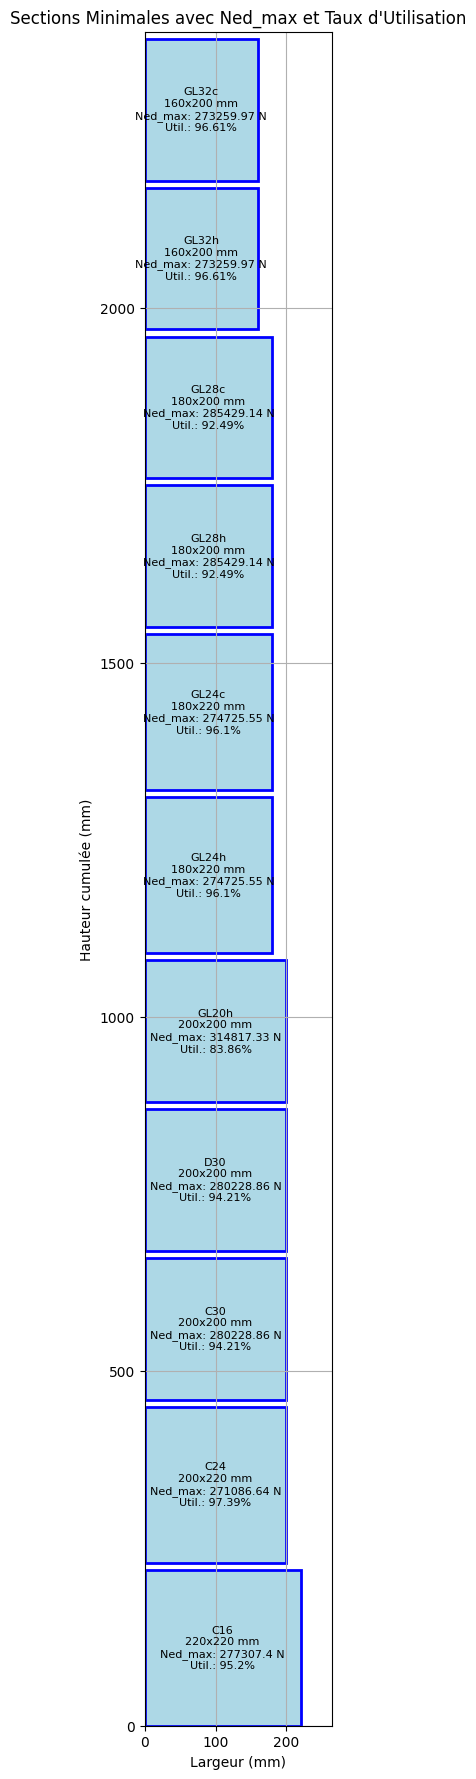

In [17]:
# Importation des bibliothèques
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display

# PARTIE 1: Paramètres des dimensions des bois
types_massif = ["C16", "C24", "C30", "D30"]
types_blc = ["GL20h", "GL24h", "GL24c", "GL28h", "GL28c", "GL32h", "GL32c"]

# PARTIE 3: Création des DataFrames pour les dimensions
def creer_dataframe(types, dimensions):
    """
    Crée un DataFrame pandas pour les dimensions des bois spécifiques.

    Args:
        types (list): Liste des types de bois.
        dimensions (list): Liste de tuples contenant les dimensions.

    Returns:
        pd.DataFrame: DataFrame contenant les combinaisons de b et h pour chaque type de bois.
    """
    data = {"Type de Bois": [], "b (mm)": [], "h (mm)": []}
    for type_bois in types:
        for b, h_values in dimensions:
            for h in h_values:
                data["Type de Bois"].append(type_bois)
                data["b (mm)"].append(b)
                data["h (mm)"].append(h)
    df = pd.DataFrame(data)
    # Calcul de l'aire pour le tri
    df['Aire (mm²)'] = df['b (mm)'] * df['h (mm)']
    # Tri par aire croissante pour trouver les sections minimales
    df = df.sort_values(by='Aire (mm²)').reset_index(drop=True)
    # Supprimer la colonne temporaire d'aire
    df = df.drop(columns=['Aire (mm²)'])
    return df

# Création des DataFrames pour chaque type de bois
df_bois_massif = creer_dataframe(types_massif, dimensions_standard["Bois Massif"])
df_bois_blc = creer_dataframe(types_blc, dimensions_standard["BLC"])

df_bois_combined = pd.concat([df_bois_massif, df_bois_blc], ignore_index=True)

# PARTIE 4: Définition des Facteurs \(\eta_t\) en Fonction du Type de Charge
# Ajout d'un dictionnaire pour mapper les types de charge à \(\eta_t\)
eta_t_values = {
    "période infinie": 1.0,
    "choc": 1.4
    # Vous pouvez ajouter d'autres types de charge ici si nécessaire
}

# PARTIE 5: Calcul des Paramètres de Flambage
def calculer_kc(lambda_rel, beta_c):
    """
    Calcule le coefficient kc en fonction de lambda_rel et beta_c.
    kc est borné entre 0.1 et 1.0.

    Args:
        lambda_rel (float): Longueur relative de flambage (sans dimension).
        beta_c (float): Coefficient beta_c.

    Returns:
        tuple: (kc, k) où kc est limité entre 0.1 et 1.0, et k est une valeur intermédiaire.
    """
    try:
        k = 0.5 * (1 + beta_c * (lambda_rel - 0.3) + lambda_rel**2)
        discriminant = k**2 - lambda_rel**2
        if discriminant >= 0:
            kc = 1 / (k + math.sqrt(discriminant))
        else:
            kc = 1.0  # Valeur par défaut si le discriminant est négatif
        kc = max(min(kc, 1.0), 0.1)  # kc borné entre 0.1 et 1.0
        print(f"Calcul kc: lambda_rel={lambda_rel:.3f}, k={k:.3f}, discriminant={discriminant:.3f}, kc={kc:.3f}")  # Debug
    except Exception as e:
        print(f"Erreur lors du calcul de kc: {e}")
        kc = 1.0  # Valeur par défaut en cas d'erreur
        k = 0.5 * (1 + beta_c * (lambda_rel - 0.3) + lambda_rel**2)
    return kc, k

# PARTIE 6: Fonction pour Trouver la Section Minimale par Type de Bois
def section_minimale_par_bois(Ned, Lk, nt, nw):
    """
    Trouve la section minimale pour chaque type de bois en fonction de Ned, Lk, type de charge et classe d'humidité.
    Prend en compte les deux axes (y et z) pour le flambage.

    Args:
        Ned (float): Effort normal en N.
        Lk (float): Longueur de flambage en mm.
        nt (str): Type de charge ("période infinie", "choc", ou autre).
        nw (int): Classe d'humidité (1, 2 ou 3).

    Returns:
        pd.DataFrame: DataFrame contenant les sections minimales trouvées.
    """
    resultats = []

    # Récupérer le facteur \(\eta_t\) basé sur le type de charge
    eta_t = eta_t_values.get(nt.lower(), 1.4)  # Valeur par défaut si nt non reconnu

    # Récupérer le facteur \(\eta_w\) basé sur la classe d'humidité
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(nw, 1.0)

    for type_bois, params in parametres_bois.items():
        f_c0d_base = params["f_c0d"]
        lambda_factor = params["lambda_factor"]
        beta_c = params["beta_c"]

        # Itérer sur chaque section triée par aire croissante
        for _, row in df_bois_combined.iterrows():
            b = row["b (mm)"]
            h = row["h (mm)"]
            A = b * h  # Aire de la section en mm²

            # Calcul du rayon de giration pour chaque axe (y et z)
            r_y = 0.289 * h
            r_z = 0.289 * b

            # Calcul de l'élancement relatif pour chaque axe
            lambda_rel_y = Lk / (r_y * lambda_factor)
            lambda_rel_z = Lk / (r_z * lambda_factor)

            # Appliquer une valeur minimale de sécurité
            lambda_rel_y = max(lambda_rel_y, 0.1)
            lambda_rel_z = max(lambda_rel_z, 0.1)

            # Calcul des coefficients kc et k pour chaque axe
            kc_y, k_y = calculer_kc(lambda_rel_y, beta_c)
            kc_z, k_z = calculer_kc(lambda_rel_z, beta_c)

            # Calcul de la résistance modifiée (en N/mm²)
            f_c0d_mod = f_c0d_base * eta_t * eta_w

            # Calcul de Ned_max pour chaque axe (en N)
            Ned_max_y = kc_y * f_c0d_mod * A
            Ned_max_z = kc_z * f_c0d_mod * A

            # Le Ned_max global est le minimum des deux axes
            Ned_max = min(Ned_max_y, Ned_max_z)

            # Calcul du taux d'utilisation (%) pour chaque axe
            taux_utilisation_y = (Ned / Ned_max_y) * 100
            taux_utilisation_z = (Ned / Ned_max_z) * 100

            # Taux d'utilisation global est le maximum des deux axes
            taux_utilisation = max(taux_utilisation_y, taux_utilisation_z)
            taux_utilisation = round(taux_utilisation, 2)

            if Ned <= Ned_max:
                resultats.append({
                    "Type de Bois": type_bois,
                    "b (mm)": b,
                    "h (mm)": h,
                    "Aire (mm²)": A,
                    "lambda_rel_y": round(lambda_rel_y, 3),
                    "k_y": round(k_y, 3),
                    "k_c_y": round(kc_y, 3),
                    "lambda_rel_z": round(lambda_rel_z, 3),
                    "k_z": round(k_z, 3),
                    "k_c_z": round(kc_z, 3),
                    "f_c0d_mod (N/mm²)": round(f_c0d_mod, 3),
                    "Ned_max_y (N)": round(Ned_max_y, 2),
                    "Ned_max_z (N)": round(Ned_max_z, 2),
                    "Ned_max (N)": round(Ned_max, 2),
                    "Taux d'Utilisation (%)": min(taux_utilisation, 100)  # Limite à 100%
                })
                break  # Trouvé la section minimale pour ce type de bois

    # Convertir les résultats en DataFrame
    return pd.DataFrame(resultats)

# PARTIE 7: Dessin des Sections à l'Échelle avec Type de Bois
def dessiner_sections(df):
    """
    Dessine les sections minimales à l'échelle avec le type de bois, l'aire théorique et le taux d'utilisation.

    Args:
        df (pd.DataFrame): DataFrame contenant les sections minimales trouvées.
    """
    fig, ax = plt.subplots(figsize=(12, len(df) * 2))
    y_offset = 0  # Position verticale pour chaque section

    for _, row in df.iterrows():
        b, h = row["b (mm)"], row["h (mm)"]
        type_bois = row["Type de Bois"]
        taux_utilisation = row["Taux d'Utilisation (%)"]
        Ned_max = row["Ned_max (N)"]
        ax.add_patch(Rectangle((0, y_offset), b, h, edgecolor='blue', facecolor='lightblue', lw=2))
        plt.text(
            b / 2, 
            y_offset + h / 2, 
            f"{type_bois}\n{b}x{h} mm\nNed_max: {Ned_max} N\nUtil.: {taux_utilisation}%", 
            ha='center', va='center', fontsize=8, color='black'
        )
        y_offset += h + 10  # Espace entre les sections

    ax.set_xlim(0, max(df["b (mm)"]) * 1.2)
    ax.set_ylim(0, y_offset)
    ax.set_aspect('equal')
    plt.xlabel("Largeur (mm)")
    plt.ylabel("Hauteur cumulée (mm)")
    plt.title("Sections Minimales avec Ned_max et Taux d'Utilisation")
    plt.grid(True)
    plt.show()

# PARTIE 8: Exemple d'Utilisation
if __name__ == "__main__":
    # Paramètres d'entrée
    Ned = 264000  # Effort normal en N
    Lk = 4200  # Longueur de flambage en mm
    nt = "période infinie"  # Type de charge ("période infinie", "choc", ou autre)
    nw = 1  # Classe d'humidité (1, 2 ou 3)

    # Calcul des sections minimales
    resultats_sections = section_minimale_par_bois(Ned, Lk, nt, nw)

    # Affichage des résultats
    print("\n### Résultats du Calcul ###")
    print(f"Effort normal (Ned) : {Ned} N")
    print(f"Longueur de flambage (Lk) : {Lk} mm")
    print(f"Type de charge : {nt}")
    print(f"Classe d'humidité : {nw}\n")
    display(resultats_sections)

    # Dessin des sections minimales
    if not resultats_sections.empty:
        print("\n### Dessin des Sections Minimales ###")
        dessiner_sections(resultats_sections)
    else:
        print("\nAucune section minimale trouvée avec les paramètres fournis.")



SOURCE :
 Dimensionement des structure en bois (aide a l'utilisation des normes SIA 260, 261 et 265)- Pierre André Dupraz - HEPIA 2023


 Lignum